Explore the performance of K-Means clustering algorithm on the dataset you have chosen already.
Check for 6 different clusters and give your interpretation
Use elbow method to optimize the number of clusters
Use visualization techniques to present your interpretation

**Importing libraries for plotting and processing**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

Reading CSV 

In [ ]:
df = pd.read_csv('/content/CPU_benchmark.csv')
df.head()

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,NaN,"108,822",NaN,"3,330",NaN,280.0,388.65,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,7299.99,"88,338",12.10,"2,635",0.36,280.0,315.49,64,2021,SP3,Server
2,AMD EPYC 7J13,NaN,"86,006",NaN,"2,387",NaN,NaN,NaN,64,2021,unknown,Server
3,AMD EPYC 7713,7060.00,"85,861",12.16,"2,727",0.39,225.0,381.6,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,6807.98,"83,971",12.33,"2,626",0.39,280.0,299.9,64,2020,sWRX8,Desktop


Calculating total null values in each attribute

In [ ]:
df.isnull().sum()

cpuName           0
price          1858
cpuMark           0
cpuValue       1858
threadMark        0
threadValue    1858
TDP             685
powerPerf       685
cores             0
testDate          0
socket            0
category          0
dtype: int64

Fill numerical nullvalues using fill by mean method

In [ ]:
df=df.fillna(df.mean())

Checking if there are any null values present after

In [ ]:
df.isnull().sum()

cpuName          0
price            0
cpuMark          0
cpuValue         0
threadMark       0
threadValue      0
TDP              0
powerPerf      685
cores            0
testDate         0
socket           0
category         0
dtype: int64

Dropping rest of null values

In [ ]:
df=df.dropna()

Checking if there are any more null values

In [ ]:
df.isnull().sum()

cpuName        0
price          0
cpuMark        0
cpuValue       0
threadMark     0
threadValue    0
TDP            0
powerPerf      0
cores          0
testDate       0
socket         0
category       0
dtype: int64

Removing numerical values with commas

In [ ]:
df['cpuMark'] = df['cpuMark'].str.replace(',', '').astype(float)

In [ ]:
df['threadMark'] = df['threadMark'].str.replace(',', '').astype(float)

Describing the dataset

In [ ]:
df.describe()

,price,cpuMark,cpuValue,threadMark,threadValue,TDP,cores,testDate
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,443.737219,6676.840446,35.539132,1507.485987,15.207757,62.375557,4.828981,2014.301274
std,717.004837,10016.130992,28.202255,798.104626,14.109643,47.555107,5.899097,4.224468
min,3.990000,77.000000,0.220000,83.000000,0.130000,2.000000,1.000000,2007.000000
25%,117.997500,1101.250000,20.182500,877.750000,7.670000,28.000000,2.000000,2010.000000
50%,441.500946,2789.500000,35.354911,1397.000000,15.189009,53.000000,4.000000,2014.000000
75%,441.500946,7694.500000,35.354911,2054.250000,15.189009,85.000000,4.000000,2018.000000
max,8978.000000,108822.000000,345.330000,4317.000000,267.820000,300.000000,64.000000,2022.000000


Scatter plotting Powerdraw vs Core Count

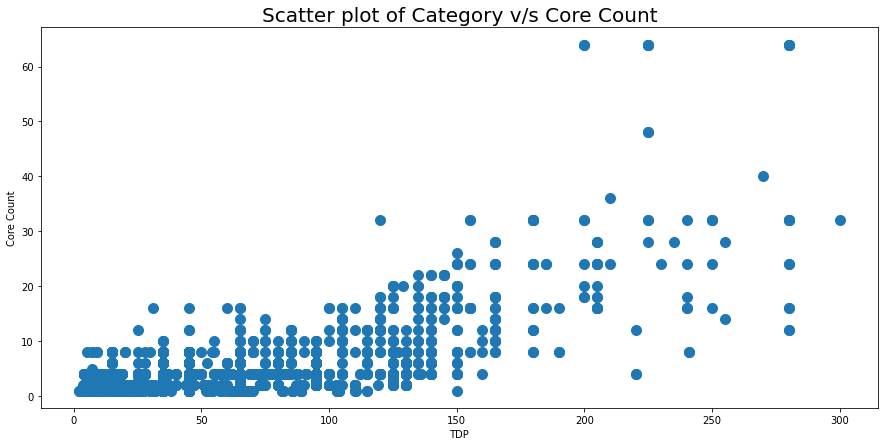

In [ ]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Category v/s Core Count', fontsize = 20)
plt.xlabel('TDP')
plt.ylabel('Core Count')
plt.scatter( x = 'TDP', y = 'cores', data = df, s = 100)
plt.show()

Finding the optimum number of clusters

In [ ]:
X1 = df[['TDP' , 'cores']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

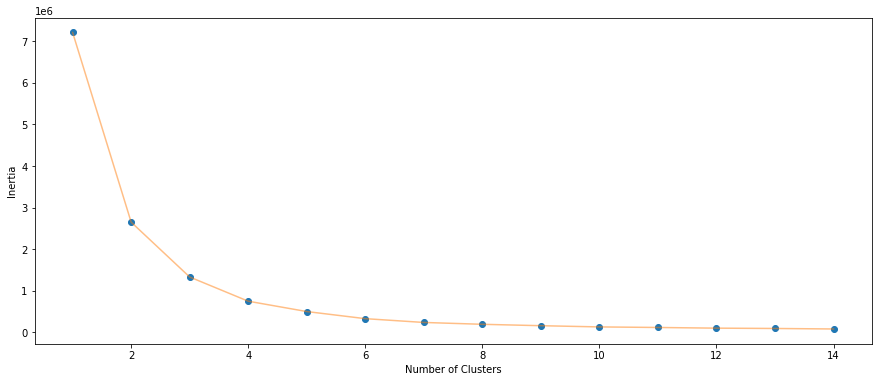

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

# **Performing K-Means**

In [ ]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

# **Plotting for K=6**

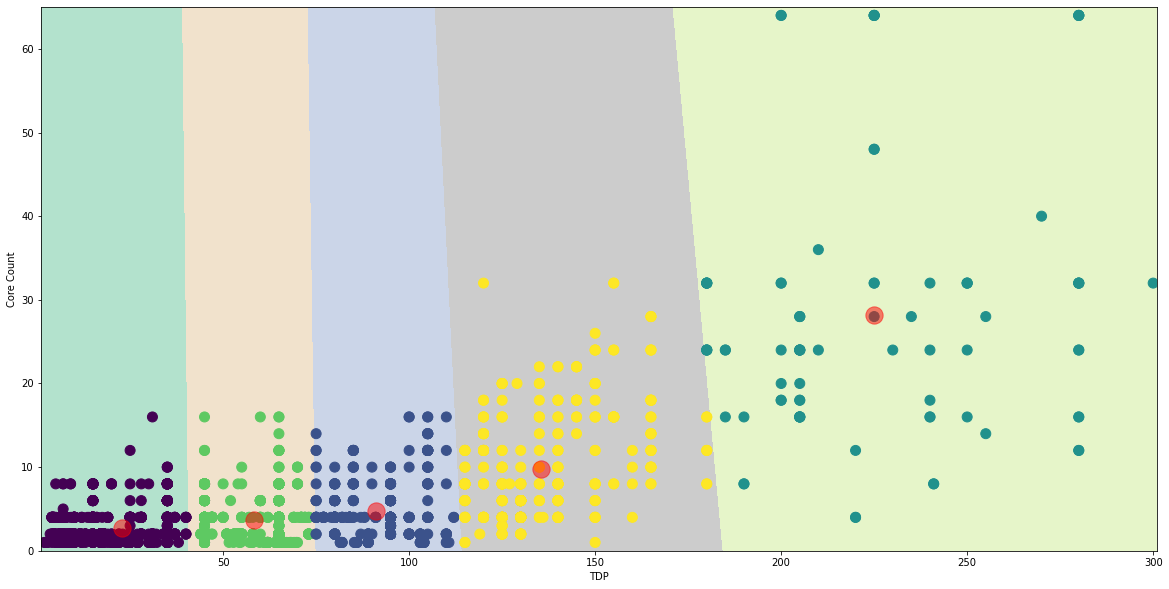

In [ ]:
plt.figure(1 , figsize = (20 , 10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'TDP', y = 'cores', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Core Count') , plt.xlabel('TDP')
plt.show()

From Elbow method we have found the optimal number of clusters are 5, since the line is flattering just before k=6

# **Plotting for K=5**

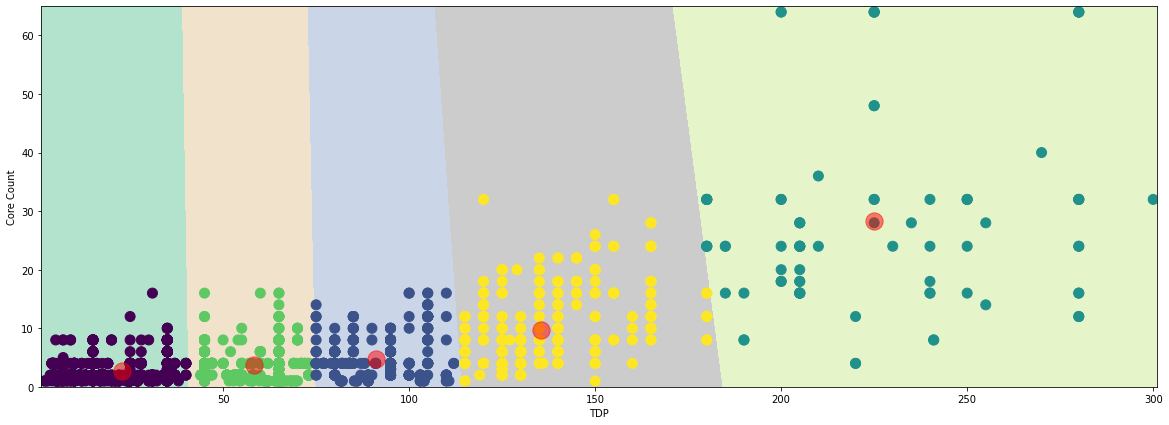

In [ ]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (20 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'TDP', y = 'cores', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Core Count') , plt.xlabel('TDP')
plt.show()